# Digital Signal Processing

### MsCV - ViBOT - MAIA

In [2]:
%matplotlib inline
%pprint off

# To make some nice plot
import matplotlib.pyplot as plt
# To play with arrays
import numpy as np
import scipy as sp
from skimage import io

from skimage import img_as_float
from matplotlib import cm
from skimage import img_as_ubyte
from scipy import signal



Pretty printing has been turned OFF


## Filtering 
**1.1**

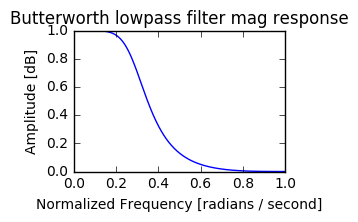

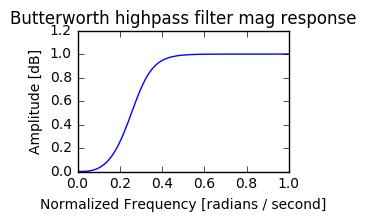

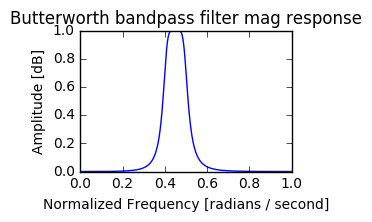

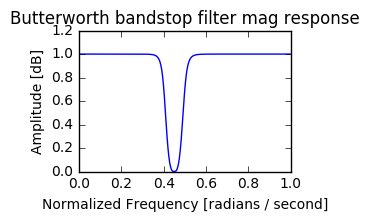

In [3]:
#low pass
b, a = signal.butter(3, 0.3, 'low', analog=False)

#w, h = signal.freqs(b, a)
w, h = signal.freqz(b, a)

#plt.plot(w, 20 * np.log10(abs(h)))
plt.subplot(2, 2, 1)
plt.plot(w/np.pi, 1.0 * np.abs(h))
#plt.xscale('log')
plt.title('Butterworth lowpass filter mag response')
plt.xlabel('Normalized Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')

plt.show()


#High pass
b, a = signal.butter(3, 0.3, 'high', analog=False)

#w, h = signal.freqs(b, a)
w, h = signal.freqz(b, a)

#plt.plot(w, 20 * np.log10(abs(h)))
plt.subplot(2, 2, 2)
plt.plot(w/np.pi, 1.0 * np.abs(h))
#plt.xscale('log')
plt.title('Butterworth highpass filter mag response')
plt.xlabel('Normalized Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')

plt.show()

#band pass
b, a = signal.butter(3, [0.4,0.5], 'bandpass', analog=False)

#w, h = signal.freqs(b, a)
w, h = signal.freqz(b, a)

#plt.plot(w, 20 * np.log10(abs(h)))
plt.subplot(2, 2, 3)
plt.plot(w/np.pi, 1.0 * np.abs(h))
#plt.xscale('log')
plt.title('Butterworth bandpass filter mag response')
plt.xlabel('Normalized Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')

plt.show()

#band stop
b, a = signal.butter(3, [0.4,0.5], 'bandstop', analog=False)

#w, h = signal.freqs(b, a)
w, h = signal.freqz(b, a)

#plt.plot(w, 20 * np.log10(abs(h)))
plt.subplot(2, 2, 4)
plt.plot(w/np.pi, 1.0 * np.abs(h))
#plt.xscale('log')
plt.title('Butterworth bandstop filter mag response')
plt.xlabel('Normalized Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')

plt.show()


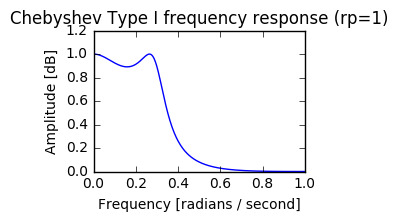

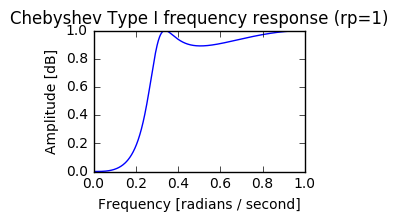

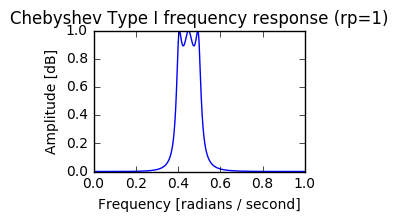

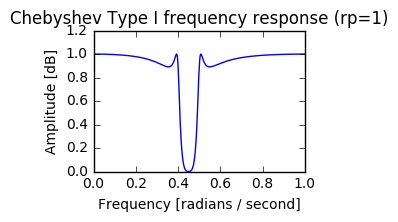

In [4]:

b, a = signal.cheby1(3, 1, 0.3, 'low', analog=False)
w, h = signal.freqz(b, a)

plt.subplot(2, 2, 1)
plt.plot(w/np.pi, 1.0 * np.abs(h))
#plt.xscale('log')
plt.title('Chebyshev Type I frequency response (rp=1)')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
#plt.margins(0, 0.1)
#plt.grid(which='both', axis='both')
#plt.axvline(1, color='green') # cutoff frequency
#plt.axhline(-5, color='green') # rp
plt.show()


b, a = signal.cheby1(3, 1, 0.3, 'high', analog=False)
w, h = signal.freqz(b, a)

plt.subplot(2, 2, 2)
plt.plot(w/np.pi, 1.0 * np.abs(h))
#plt.xscale('log')
plt.title('Chebyshev Type I frequency response (rp=1)')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
#plt.margins(0, 0.1)
#plt.grid(which='both', axis='both')
#plt.axvline(1, color='green') # cutoff frequency
#plt.axhline(-5, color='green') # rp
plt.show()

b, a = signal.cheby1(3, 1, [0.4,0.5], 'bandpass', analog=False)
w, h = signal.freqz(b, a)

plt.subplot(2, 2, 3)
plt.plot(w/np.pi, 1.0 * np.abs(h))
#plt.xscale('log')
plt.title('Chebyshev Type I frequency response (rp=1)')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
#plt.margins(0, 0.1)
#plt.grid(which='both', axis='both')
#plt.axvline(1, color='green') # cutoff frequency
#plt.axhline(-5, color='green') # rp
plt.show()

b, a = signal.cheby1(3, 1, [0.4,0.5], 'bandstop', analog=False)
w, h = signal.freqz(b, a)

plt.subplot(2, 2, 4)
plt.plot(w/np.pi, 1.0 * np.abs(h))
#plt.xscale('log')
plt.title('Chebyshev Type I frequency response (rp=1)')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
#plt.margins(0, 0.1)
#plt.grid(which='both', axis='both')
#plt.axvline(1, color='green') # cutoff frequency
#plt.axhline(-5, color='green') # rp
plt.show()


**1.2**

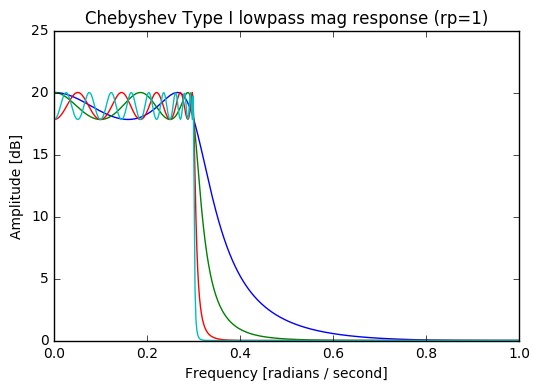

In [5]:

b, a = signal.cheby1(3, 1, 0.3, 'low', analog=False)
w3, h3 = signal.freqz(b, a)

b, a = signal.cheby1(5, 1, 0.3, 'low', analog=False)
w5, h5 = signal.freqz(b, a)

b, a = signal.cheby1(10, 1, 0.3, 'low', analog=False)
w10, h10 = signal.freqz(b, a)

b, a = signal.cheby1(20, 1, 0.3, 'low', analog=False)
w20, h20 = signal.freqz(b, a)

plt.plot(w3/np.pi, 20 * np.abs(h3), w5/np.pi, 20 * np.abs(h5), w10/np.pi, 20 * np.abs(h10), w20/np.pi, 20 * np.abs(h20))
#plt.legend('order3', 'order5', 'order10', 'order20')
#plt.xscale('log')
plt.title('Chebyshev Type I lowpass mag response (rp=1)')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.show()

## Recursive filter 

**2.1**

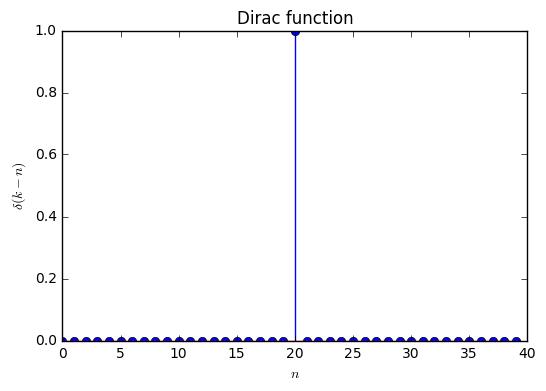

In [6]:
def dirac(n=0, N=40):
    # Check that the parameter are valid
    if n > N - 1:
        raise ValueError('n should be inferior to N-1')
    
    # Create the array
    s = np.zeros((N, ))
    # Place the dirac
    s[n] = 1
    
    return s


N = 40
n = 20

plt.stem(dirac(n,N))
plt.xlabel(r'$n$')
plt.ylabel(r'$\delta(k-n)$')
plt.title('Dirac function')

**2.2**

<Container object of 3 artists>

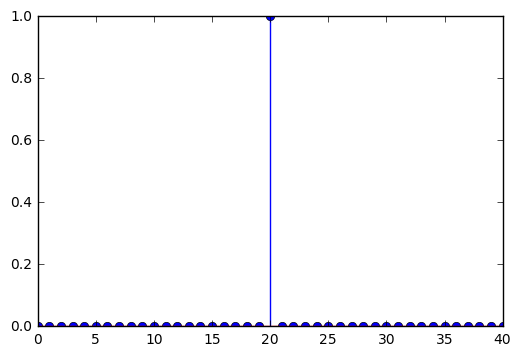

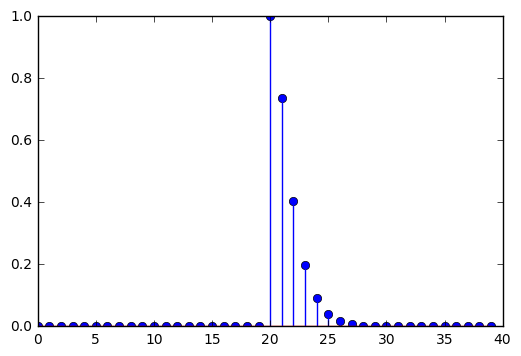

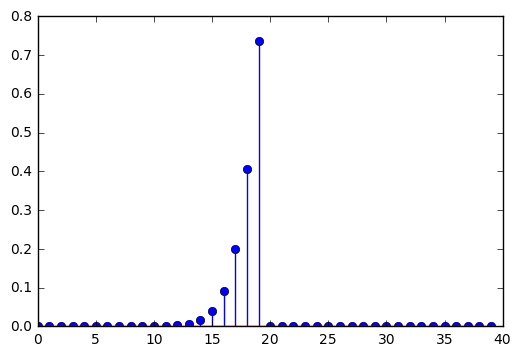

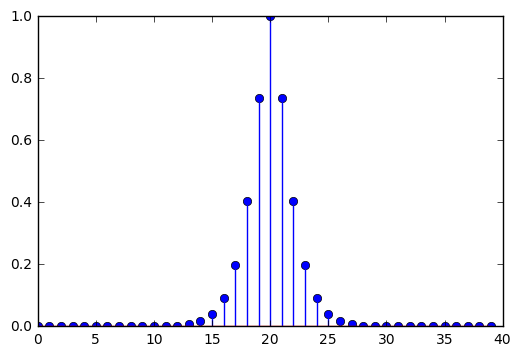

In [14]:

x = np.zeros((41))
x[20] = 1
plt.figure()
plt.stem (x)

s = 1
Ts = 1
alpha = s * Ts
a = np.exp(-alp)


yh_1 = np.zeros((40,))
for i in range (2, 40):
    yh_1[i] = x[i] + a*(alp - 1) * x[i - 1] + 2. *a*yh_1[i-1] - a**2*yh_1[i-2]
    
k = np.arange (37, -1, -1)
yh_2 = np.zeros((40,))
for i in k:
    yh_2[i] = a*(alp+1)*x[i+1] - a**2* x[i+2] + 2. *a*yh_2[i+1] - a**2*yh_2[i+2]

plt.figure()
plt.stem (yh_1)

plt.figure()
plt.stem (yh_2)

yh = yh_1 + yh_2
plt.figure()
plt.stem (yh)


**2.3**

<Container object of 3 artists>

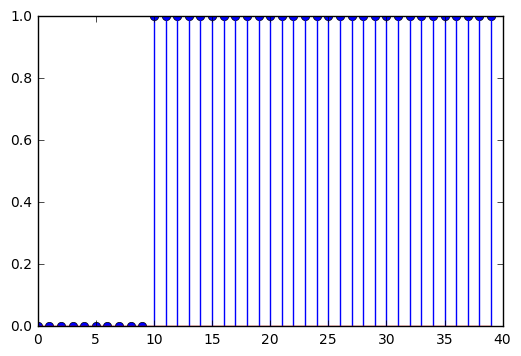

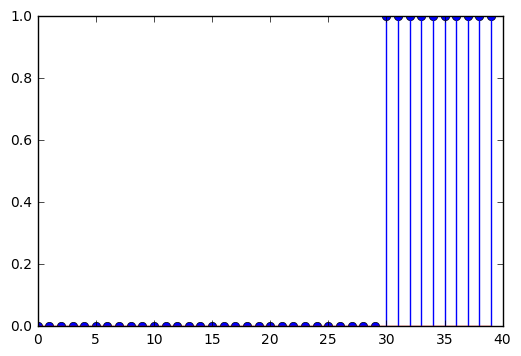

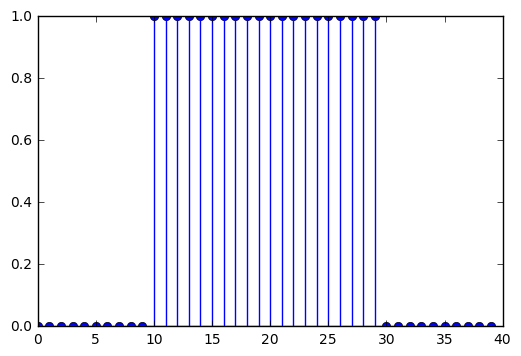

In [10]:
x_step1 = np.zeros((40))
x_step1[10:40] = 1
plt.figure()
plt.stem (x_step1)

x_step2 = np.zeros((40))
x_step2[30:40] = 1
plt.figure()
plt.stem (x_step2)

x_step = x_step1 - x_step2
plt.figure()
plt.stem (x_step)

**2.4**

<Container object of 3 artists>

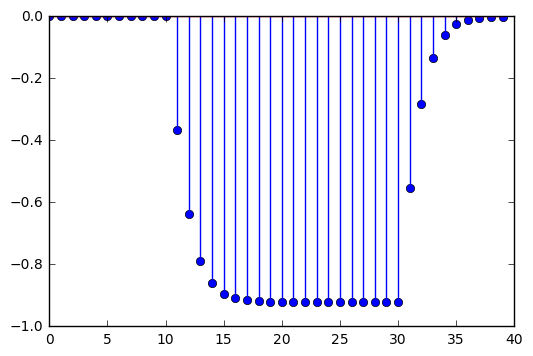

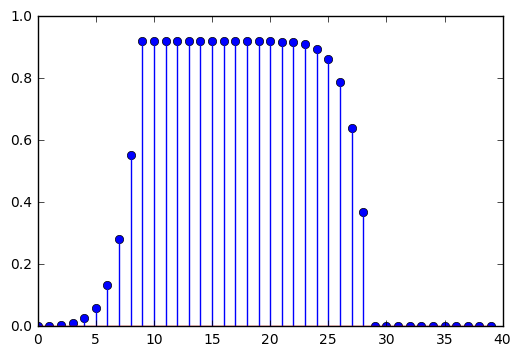

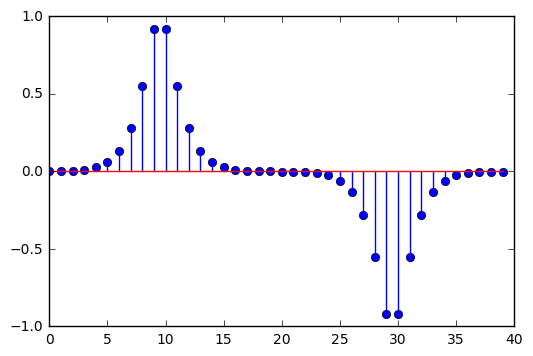

In [15]:

yf_1 = np.zeros((40,))
for i in range (2, 40):
    yf_1[i] = -s*alp*a*x_step[i-1] + 2.*a*yf_1[i - 1] - a**2*yf_1[i-2]
    
k = np.arange (37, -1, -1)
yf_2 = np.zeros((40,))
for i in k:
    yf_2[i] = s*alp*a*x_step[i+1] + 2.*a*yf_2[i+1] - a**2*yf_2[i+2]

plt.figure()
plt.stem (yf_1)

plt.figure()
plt.stem (yf_2)

yf = yf_1 + yf_2
plt.figure()
plt.stem (yf)

**3.1**

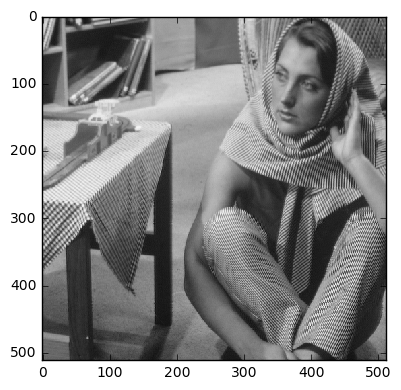

512


In [19]:
Path = '../images/'
img = io.imread(Path.__add__('barbara.gif'))
img = img_as_float(img)

plt.figure
io.imshow(img)
plt.show()

print (im.shape[0])

**3.2** , **3.3**

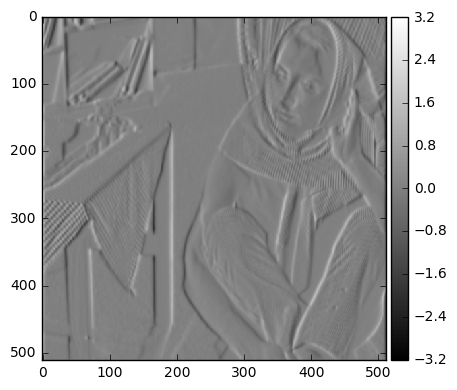

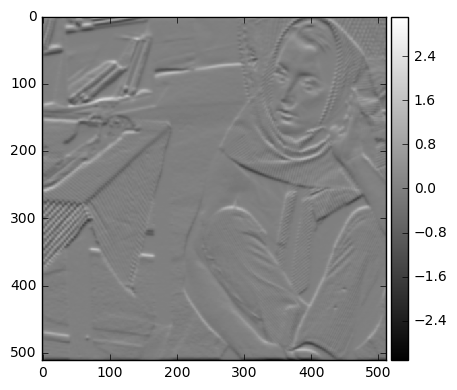

In [22]:
#3.2
column = im.shape[0]
row = column

yh_1 = np.zeros((512,512))

for i in range (2, 512):
    yh_1[i,:] = im[i,:] + a*(alp - 1) * im[i - 1, :] + 2. *a*yh_1[i-1, :] - a**2*yh_1[i -2,:]
    
yh_2 = np.zeros((512,512))
k = np.arange (509, -1, -1)
for i in k:
    yh_2[i,:] = a*(alp+1)*im[i+1, :] - a**2* im[i+2, :] + 2. *a*yh_2[i+1,:] - a**2*yh_2[i +2, :]

Img_smooth=yh_1+yh_2

yf_1 = np.zeros((512,512))
for j in range (2, 512):
    yf_1[:,j] = -s*alp*a*Img_smooth[:,j-1] + 2.*a*yf_1[:,j - 1] - a**2*yf_1[:,j-2]
    
k = np.arange (509, -1, -1)
yf_2 = np.zeros((512,512))
for j in k:
    yf_2[:,j] = s*alp*a*Img_smooth[:,j+1] + 2.*a*yf_2[:,j+1] - a**2*yf_2[:,j+2]


Img_smooth_derv = yf_1 + yf_2

plt.figure()
io.imshow(Img_smooth_derv, cmap=plt.cm.gray)



#3.3

yh_1 = np.zeros((512,512))

for i in range (2, 512):
    yh_1[:,i] = im[:,i] + a*(alp - 1) * im[:,i - 1] + 2. *a*yh_1[:,i-1] - a**2*yh_1[:,i -2]
    
yh_2 = np.zeros((512,512))
k = np.arange (509, -1, -1)
for i in k:
    yh_2[:,i] = a*(alp+1)*im[:,i+1] - a**2* im[:,i+2] + 2. *a*yh_2[:,i+1] - a**2*yh_2[:,i +2]


Img_smooth=yh_1+yh_2


yf_1 = np.zeros((512,512))
for j in range (2, 512):
    yf_1[j,:] = -s*alp*a*Img_smooth[j-1,:] + 2.*a*yf_1[j - 1,:] - a**2*yf_1[j-2,:]
    
k = np.arange (509, -1, -1)
yf_2 = np.zeros((512,512))
for j in k:
    yf_2[j,:] = s*alp*a*Img_smooth[j+1,:] + 2.*a*yf_2[j+1,:] - a**2*yf_2[j+2,:]



Im_smooth_derv = yf_1 + yf_2

plt.figure()
io.imshow(Im_smooth_derv, cmap=plt.cm.gray)
plt.show()

**3.4**